In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import quantstats as qs

In [4]:
# Get all the tickers of S&P 100 from Wikipedia

url = 'https://en.wikipedia.org/wiki/S%26P_100'
response = requests.get(url)

if response.status_code == 200:
    parsed_data = BeautifulSoup(response.content, 'html.parser')
    
    table = parsed_data.find('table', {'id': 'constituents'})
    
    if table:
        snp100 = [row.find_all('td')[0].get_text(strip=True) for row in table.find_all('tr') if row.find_all('td')]
    else:
        print("Table not found.")
else:
    print(f"Failed to fetch. Status code: {response.status_code}")

snp100


['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK.B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [5]:
# Correcting ticker name for Berkshire Hathaway

i = snp100.index('BRK.B')
snp100[i] = 'BRK-B'
snp100

['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK-B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [6]:
# Function for preprocessing data of a single ticker to desired format of Zipline

def preprocess(data):
    data.reset_index(inplace=True)
    data.drop(columns=['Adj Close'], inplace=True)
    data.rename(columns={'Date': 'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume', }, inplace=True)
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['volume'] = data['volume'].astype('float64')
    data.sort_values(by='timestamp', inplace=True)
    data.reset_index(drop=True, inplace=True)

    return data

In [7]:
# Fetching historical data for each ticker in S&P100

start_date = '2020-01-01'
end_date = '2022-12-31'

snp100_data_dict = {}

for ticker in snp100:
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
    preprocess(data).to_csv(f'CSVs/SNP100/daily/{ticker}.csv', index=False)
    snp100_data_dict[ticker] = data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## Register and Ingest S&P100 Bundle

In [9]:
!zipline bundles

csvdir <no ingestions>
nvda 2023-12-07 17:11:09.128179
quandl <no ingestions>
quantopian-quandl <no ingestions>
sgx_oil <no ingestions>
snp100 2024-01-22 10:26:30.719464


In [10]:
!zipline ingest -b snp100

[2024-01-25T14:27:21+0600-INFO][zipline.data.bundles.core]
 Ingesting snp100
Loading custom pricing data:   [####################################]  100%
Merging daily equity files:  [####################################]     
[2024-01-25T14:27:22+0600-INFO][root]
 creating /home/luqisha/.zipline/data/snp100/2024-01-25T08;27;20.429381/minute_equities.bcolz
[2024-01-25T14:27:22+0600-INFO][root]
 copying /tmp/tmptn4okw8h/snp100/2024-01-25T08;27;20.429381/minute_equities.bcolz/metadata.json -> /home/luqisha/.zipline/data/snp100/2024-01-25T08;27;20.429381/minute_equities.bcolz
[2024-01-25T14:27:22+0600-INFO][root]
 copying /tmp/tmptn4okw8h/snp100/2024-01-25T08;27;20.429381/assets-7.sqlite -> /home/luqisha/.zipline/data/snp100/2024-01-25T08;27;20.429381
[2024-01-25T14:27:22+0600-INFO][root]
 copying /tmp/tmptn4okw8h/snp100/2024-01-25T08;27;20.429381/adjustments.sqlite -> /home/luqisha/.zipline/data/snp100/2024-01-25T08;27;20.429381
[2024-01-25T14:27:22+0600-INFO][root]
 creating /home/luqish

In [11]:
!zipline bundles

csvdir <no ingestions>
nvda 2023-12-07 17:11:09.128179
quandl <no ingestions>
quantopian-quandl <no ingestions>
sgx_oil <no ingestions>
snp100 2024-01-25 08:27:20.429381
snp100 2024-01-22 10:26:30.719464


## Backtest with Keltner and MACD indicators

In [12]:
from strategy.keltner import keltner_signals, keltner_atr
from strategy.MACD import macd_signals
from zipline.api import (order, order_target, record, symbol, get_datetime,
                         order_target_percent,
                         order_target_value,
                         set_benchmark,
                         get_open_orders)
from zipline import run_algorithm

In [13]:
# Function to get dataframe of a specific ticker
def asset_df(symbol):
    df = pd.read_csv('CSVs/SNP100/daily/' + str(symbol) + '.csv')
    return df.set_index(pd.DatetimeIndex(df.timestamp))

In [14]:
%%capture kltr

capital_base = 10000
benchmark_ticker = 'AAPL'
window = 20

def initialize(context):
    context.i = 0
    context.keltner_sigs = {}
    context.macd_sigs = {}
    context.atr = {}
    

    set_benchmark(symbol(benchmark_ticker))

    assets = list()
    for ticker in snp100:
        assets.append(symbol(ticker))
    context.assets = assets
    
    # Genrating signals for each asset
    for asset in context.assets:
        df = asset_df(asset.symbol)

        context.keltner_sigs[asset.symbol] = keltner_signals(df, span=window, TimeperiodLong= 80, TimeperiodShort= 5)
        # context.atr[asset.symbol] = keltner_atr(df, span=window, TimeperiodLong= 80, TimeperiodShort= 5)
        context.macd_sigs[asset.symbol] = macd_signals(df, short_period= 12, long_period= 26, signal_period= 9)

    
def handle_data(context, data):
    context.i += 1
    if context.i < window + 1:
        return

    current_date = data.history(context.assets[0], 'price', bar_count=2, frequency="1d").index[-1]
    for asset in context.assets:
        if data.can_trade(asset) and not get_open_orders(asset):
            cash = context.portfolio.cash
            price = data.current(asset, "price")

            # position = (cash//price) // context.atr[asset.symbol][current_date]
            position = cash //price

            if context.keltner_sigs[asset.symbol][current_date] == 1: # Upward Trend indicated by Keltner
                order_target(asset, position, stop_price=(price*0.98)) # Stop loss at 2%
            elif context.keltner_sigs[asset.symbol][current_date] == -1: # Downward Trend indicated by Keltner
                if context.macd_sigs[asset.symbol][current_date] == -1: # MACD gives sell signal
                    order_target(asset, 0) # Sell all shares of the asset
            else:
                pass
    


result = run_algorithm(
    start=pd.to_datetime(start_date),
    end=pd.to_datetime(end_date),
    initialize=initialize,
    handle_data=handle_data,
    capital_base=capital_base,
    bundle='snp100',
    data_frequency='daily',
    )
                        

The strategy is an ensemble of Keltner and MACD indicators. It follows a trend-following approach. It buys an asset when the Keltner signal indicates an upward trend and places a stop-loss order to manage risk. It sells all units of the asset if both Keltner and MACD signals indicate a downward trend.

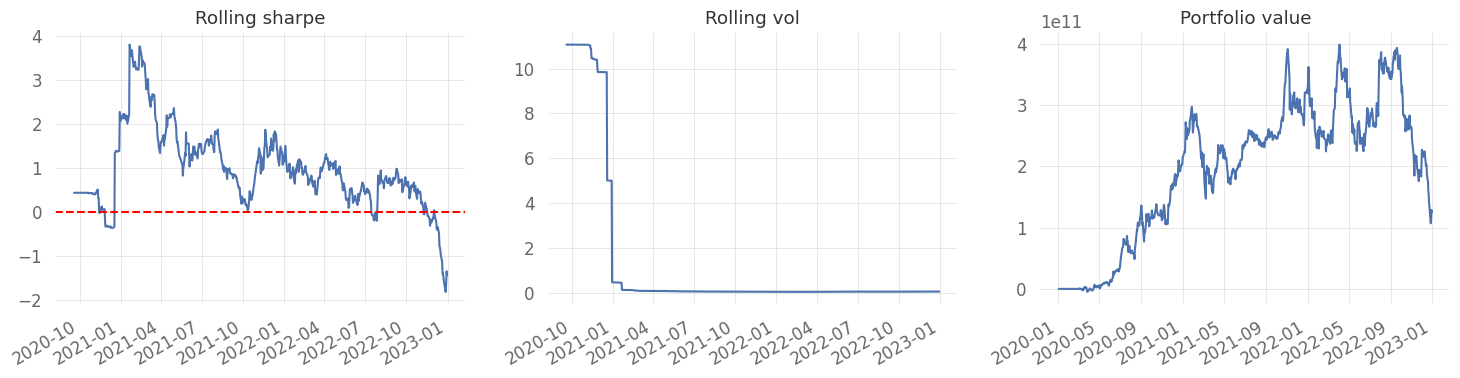

In [15]:
%matplotlib inline

import modules.stats_main as stat
result = stat.show_rolling_stats(result, 180)

The rolling sharpe plot indicates a positive sharpe as most of the value hovers on the positive side. The final portfolio value is positive here indicating profit. 

## Tearsheet with Quantstats

In [ ]:
!pip install "git+https://github.com/anchorblock/quantstats.git"

  Cloning https://github.com/anchorblock/quantstats.git to /tmp/pip-req-build-_yfs5m7k
  Running command git clone --filter=blob:none --quiet https://github.com/anchorblock/quantstats.git /tmp/pip-req-build-_yfs5m7k
  Resolved https://github.com/anchorblock/quantstats.git to commit 3d4077a9f78b09ce5145707b705a2369d1b0a49b
  Preparing metadata (setup.py) ... done
  Created wheel for QuantStats: filename=QuantStats-0.0.62-py2.py3-none-any.whl size=50270 sha256=fc0701cbfd73289845cdb411db1225a3ad8615b93aba93c4a9cfaaecf9202277
  Stored in directory: /tmp/pip-ephem-wheel-cache-mx4lnm7a/wheels/83/00/9e/95f5e78400e5db9096902343831eeb24690d01dfc3f0bfcc11
Successfully built QuantStats


In [16]:
%matplotlib inline
import quantstats as qs

benchmark_returns = yf.download(benchmark_ticker, start=start_date, end=end_date, interval='1d')['Adj Close'].pct_change()
result.returns.index = benchmark_returns.index
result.index = benchmark_returns.index


[*********************100%%**********************]  1 of 1 completed


/home/luqisha/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/luqisha/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/luqisha/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return red

                           Benchmark    Strategy
-------------------------  -----------  -----------------
Start Period               2020-02-03   2020-02-03
End Period                 2022-12-30   2022-12-30
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          71.40%       1,254,439,765.51%
Mean Active Return         0.0%         7.49%
CAGR﹪                     13.65%       4752.5%

Sharpe                     0.68         0.22
Prob. Sharpe Ratio         87.84%       63.83%
Smart Sharpe               0.67         0.22
Sortino                    1.0          0.29
Smart Sortino              0.99         0.28
Sortino/√2                 0.71         0.2
Smart Sortino/√2           0.7          0.2
Omega                      1.32         1.32

Max Drawdown               -31.43%      -516.01%
Longest DD Days            361          270
Volatility (ann.)          37.16%       8676.73%
R^2                        0.02         0.0

None

0.0137028908188879





,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-03-05,2020-03-13,2020-03-13,9,-516.011418,-299.578946
2,2020-02-18,2020-02-24,2020-02-24,7,-329.920205,-223.832141
3,2020-03-19,2020-03-26,2020-04-14,27,-255.368522,-197.387942
4,2020-03-03,2020-03-03,2020-03-03,1,-115.293770,NaN
5,2020-04-17,2020-05-01,2020-05-05,19,-90.698408,-60.119837


Average Long Exposure = 1134330357917.237
Average Short Exposure = -927526777439.7854
Average Net Leverage = 7.260729842072689
Average Gross Leverage = -10.722048997216572
Max Leverage = 6959.111732414411



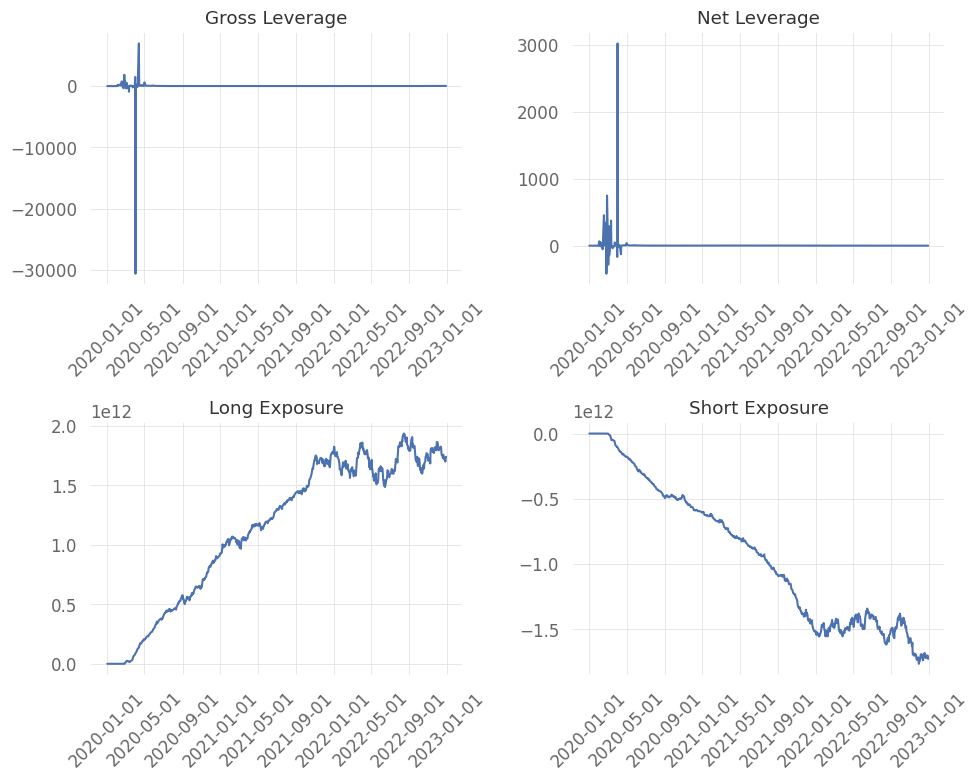

AAPL ABBV ABT ACN ADBE AIG AMD AMGN AMT AMZN AVGO AXP BA BAC BK BKNG BLK BMY BRK-B C CAT CHTR CL CMCSA COF COP COST CRM CSCO CVS CVX DE DHR DIS DOW DUK EMR EXC F FDX GD GE GILD GM GOOG GOOGL GS HD HON IBM INTC JNJ JPM KHC KO LIN LLY LMT LOW MA MCD MDLZ MDT MET META MMM MO MRK MS MSFT NEE NFLX NKE NVDA ORCL PEP PFE PG PM PYPL QCOM RTX SBUX SCHW SO SPG T TGT TMO TMUS TSLA TXN UNH UNP UPS USB V VZ WFC WMT XOM


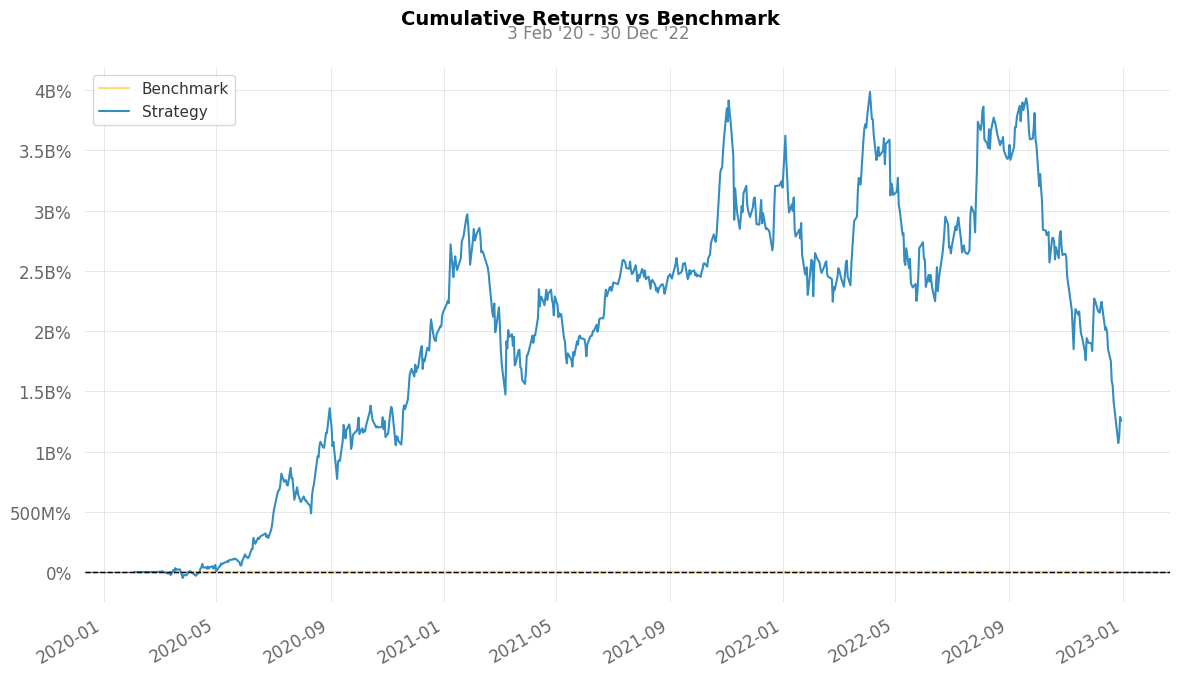

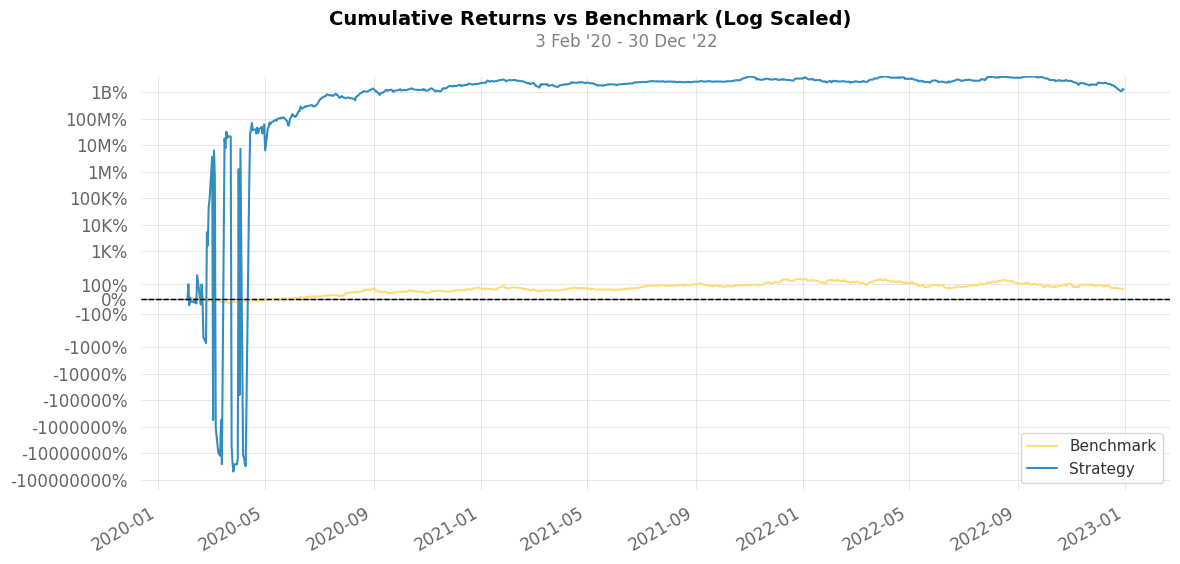

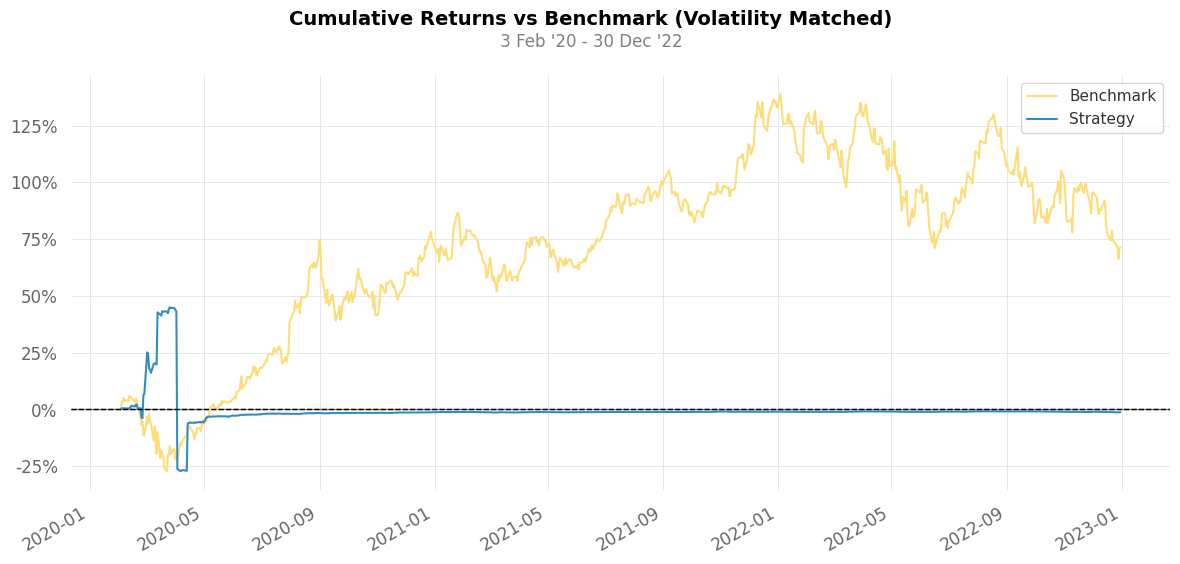

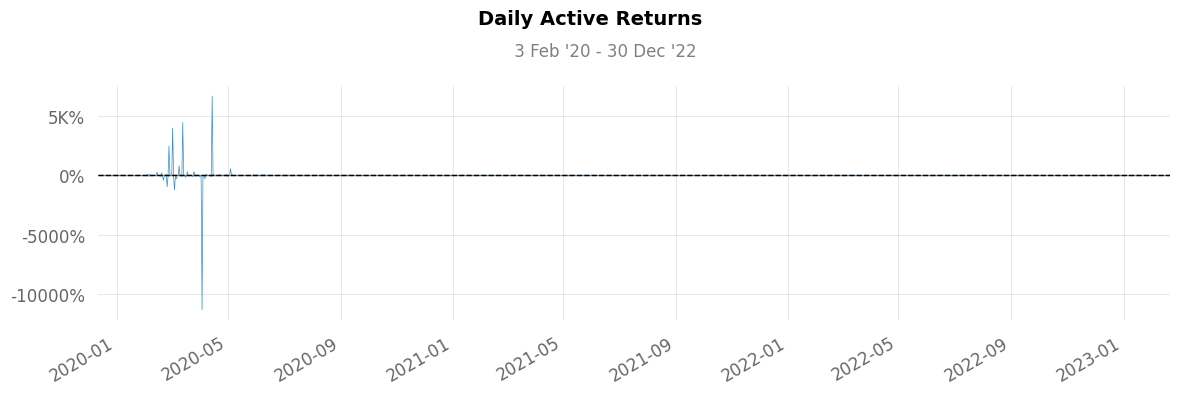

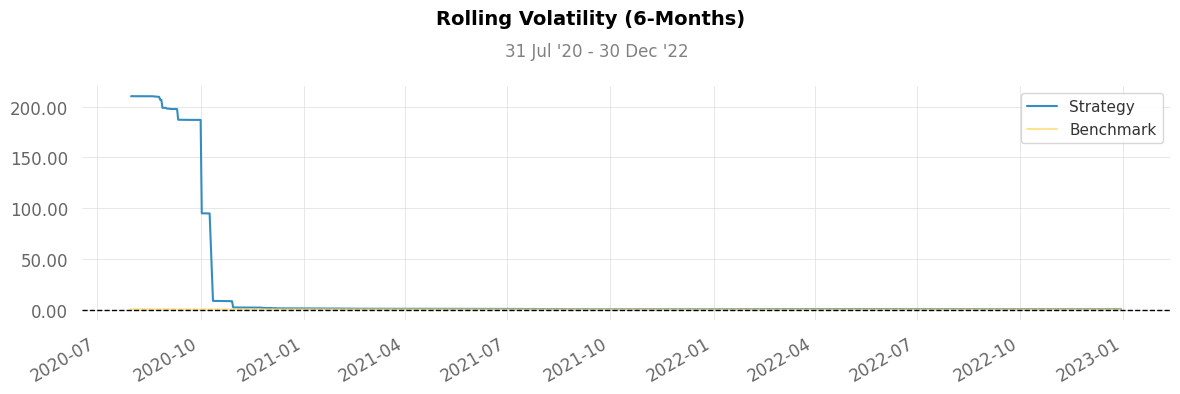

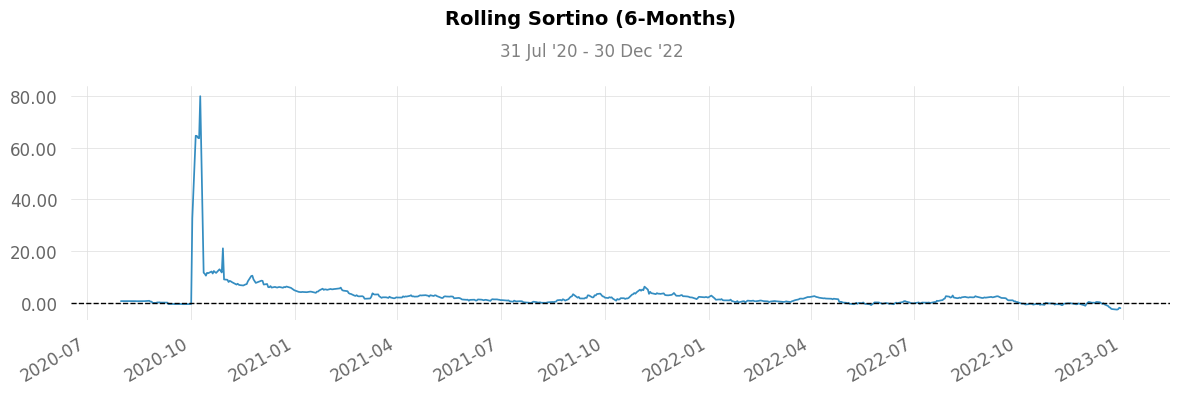

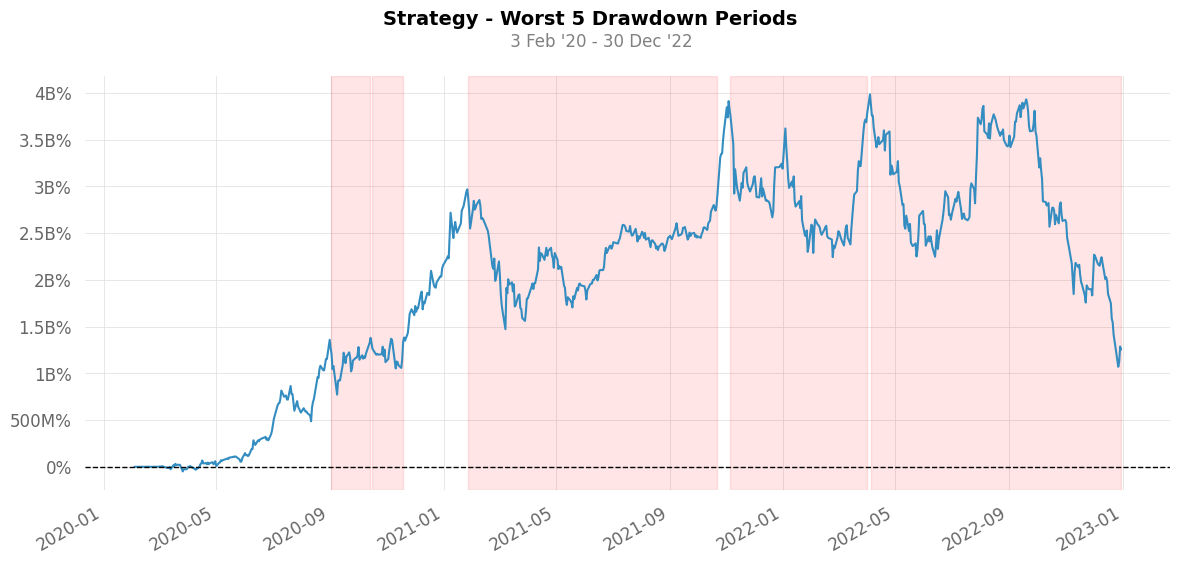

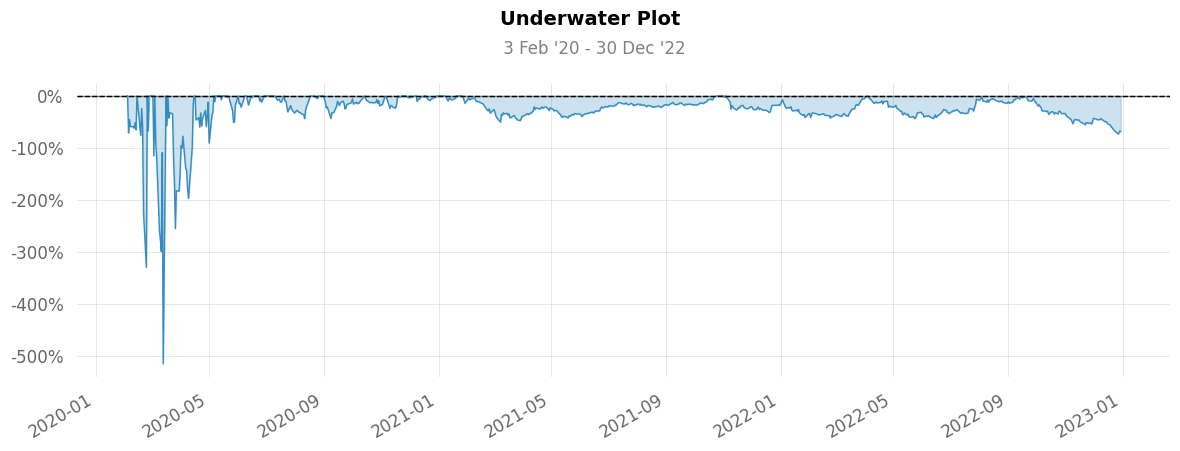

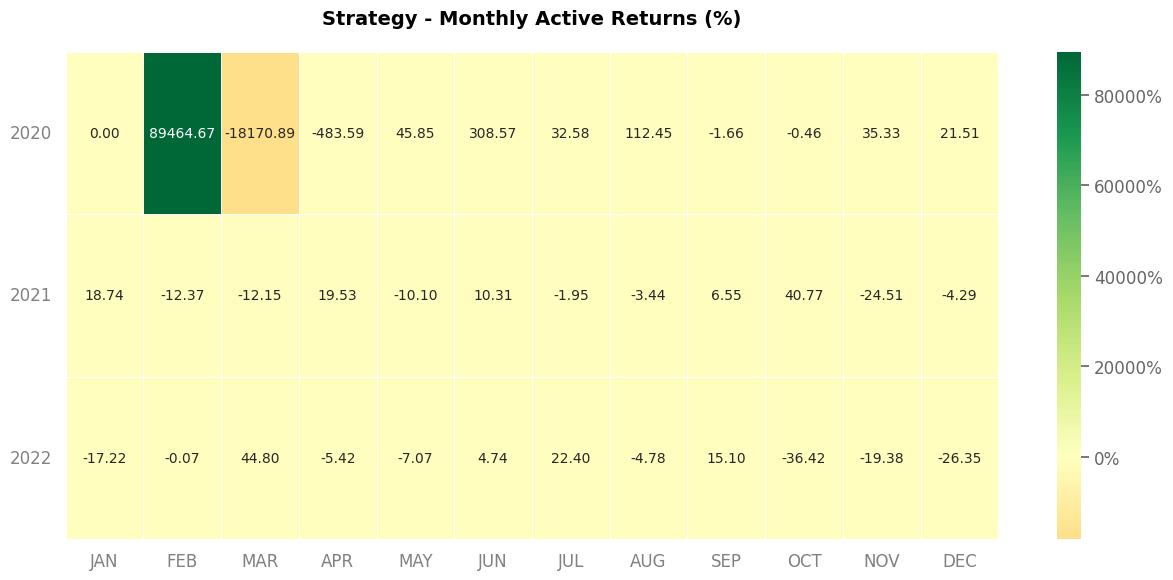

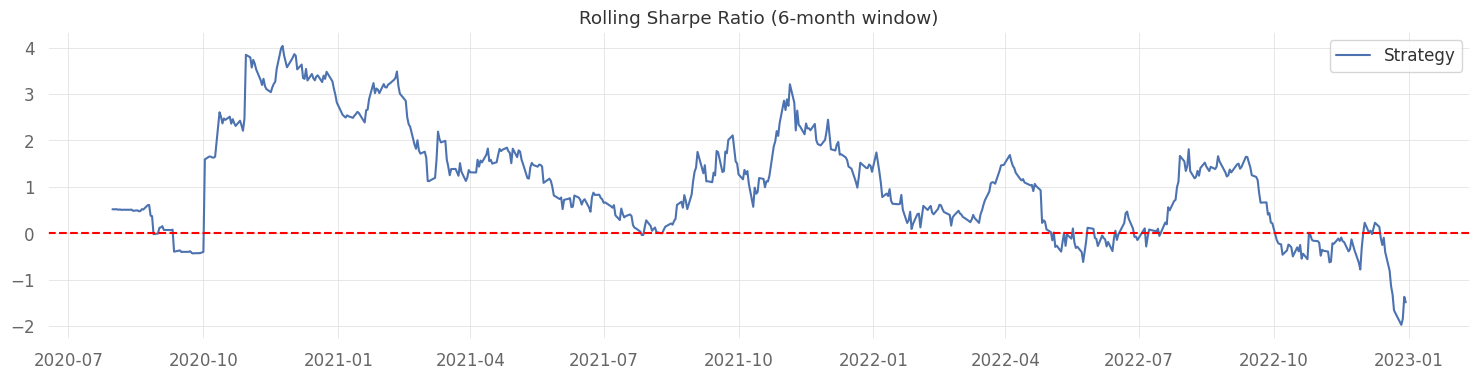

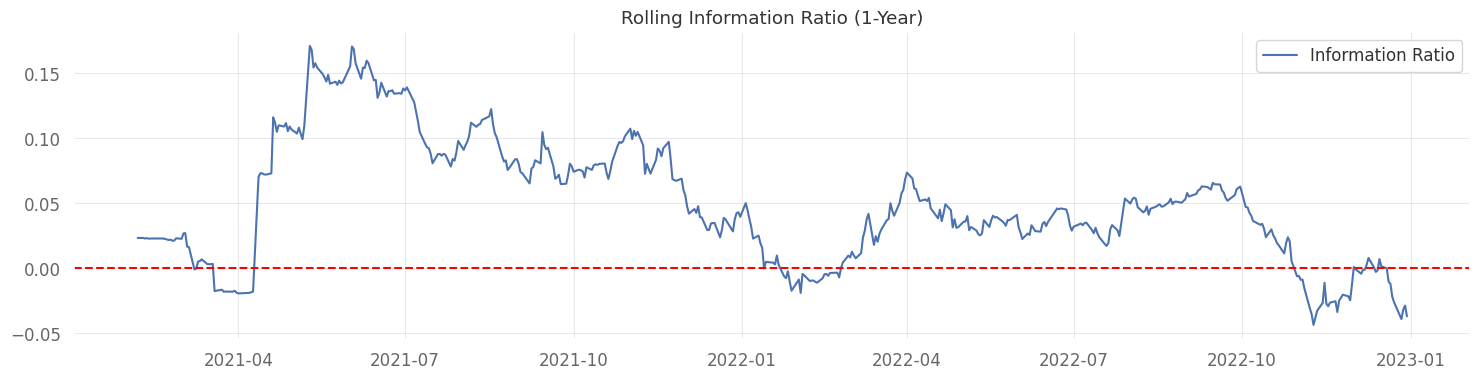

[*********************100%%**********************]  1 of 1 completed


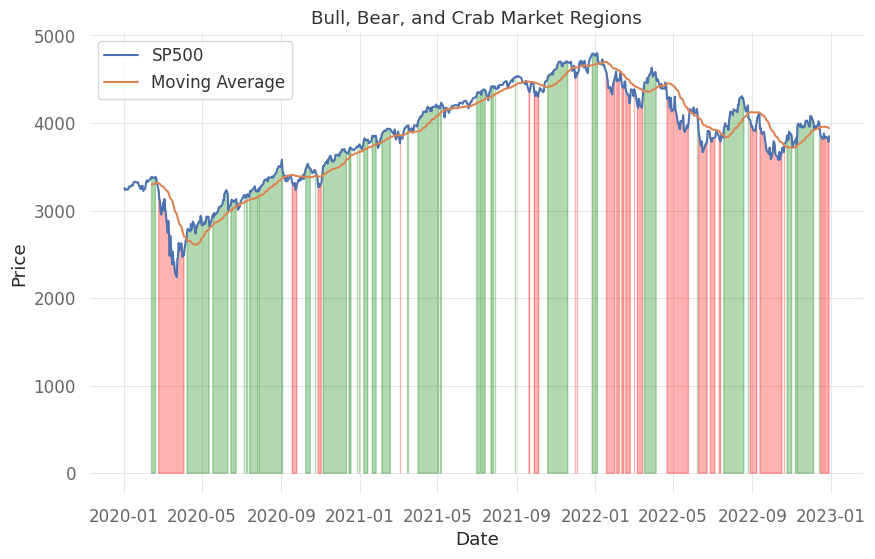

Total Trades: 51001
Daily Trades: 68
Weekly Trades: 340
Monthly Trades: 1428





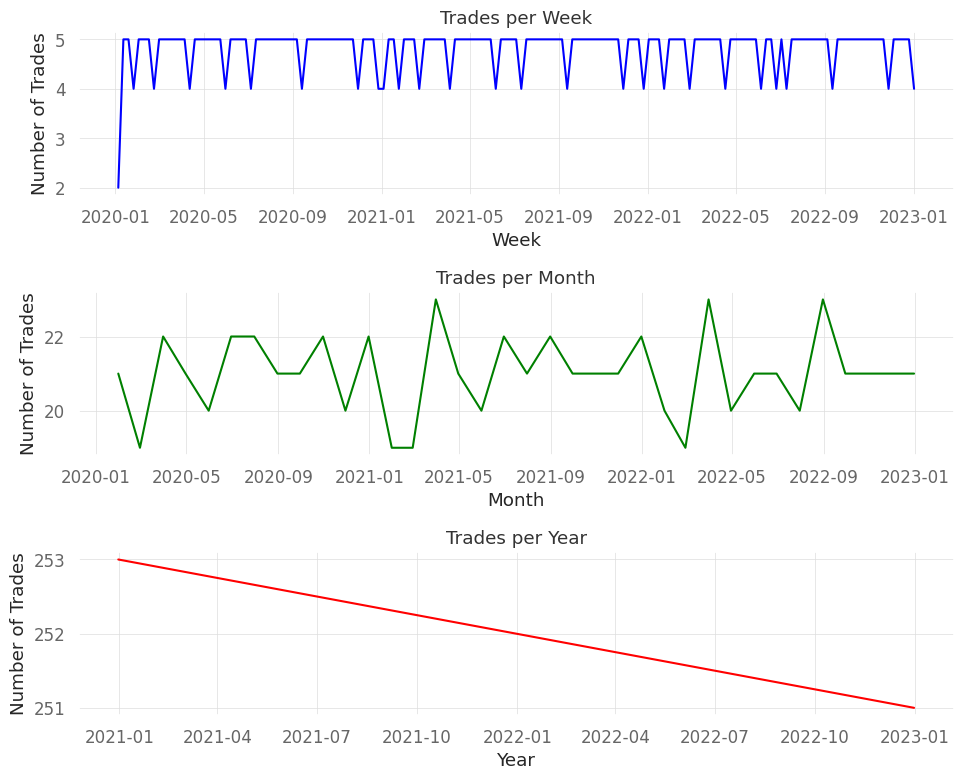

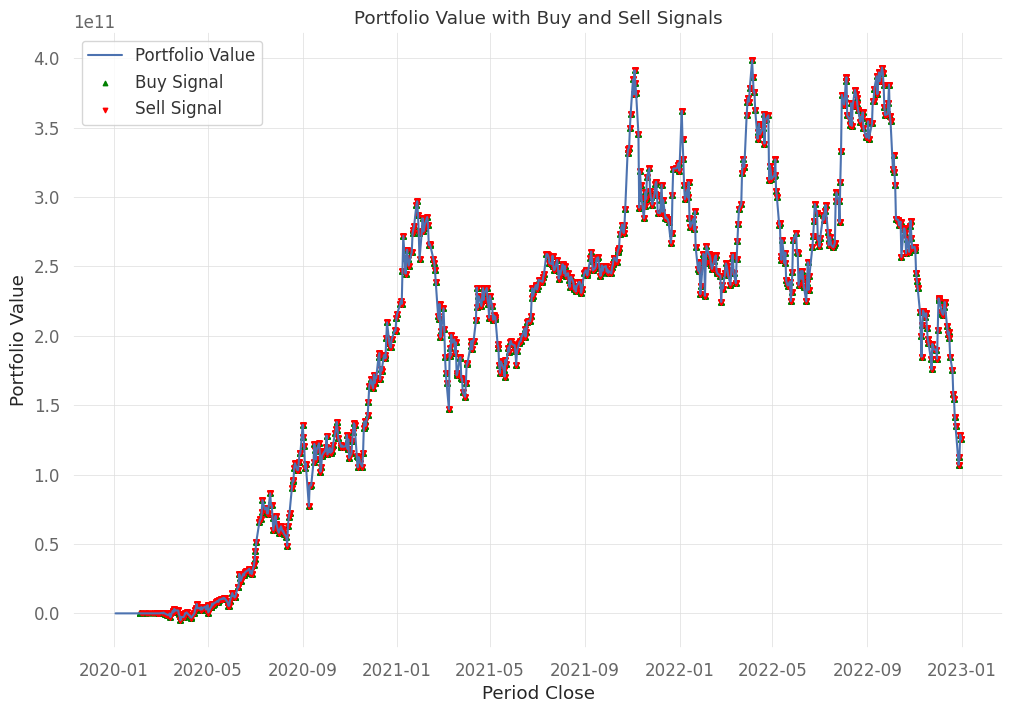

In [23]:
qs.reports.full(result.returns, benchmark=benchmark_returns, df=result, figsize=(12,8))

How to make the strategy better?

- Running an optimization algorithm on the Indicator parameters, we can find the best window size and stop-loss level that will essentially result in good returns.
- Instead of static position size when putting orders, we can decide the lot size on volatility of a stock.
- Price of an often varies depending on certain events. If we could incorporate contexts behind the changes in historical prices, by training natural language based models we can generate more accurate trade signals.